In [97]:
import geopandas as gpd
from libpysal import graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import pandas as pd

In [5]:
signatures = gpd.read_parquet("../../urbangrammar_samba/spatial_signatures/signatures/signatures_combined_levels_orig.pq")

In [7]:
# drop an outlier island
signatures = signatures.drop(96691)

In [35]:
signatures_urban = signatures[~signatures.signature_type.isin(["0_0", "4_0", "7_0", "9_6", '9_7', '9_8', '9_3'])].copy()

In [36]:
signatures_urban

,kmeans10gb,geometry,level2,signature_type
10882,1,"POLYGON Z ((143345.668 932691.413 0.000, 14334...",0.0,1_0
10883,1,"POLYGON Z ((151573.910 30042.750 0.000, 151571...",0.0,1_0
10884,1,"POLYGON Z ((151697.494 29760.709 0.000, 151650...",0.0,1_0
10885,1,"POLYGON Z ((162909.562 26425.073 0.000, 162911...",0.0,1_0
10886,1,"POLYGON Z ((164091.320 40526.696 0.000, 164093...",0.0,1_0
...,...,...,...,...
96686,9,"POLYGON Z ((528530.170 181095.720 0.000, 52854...",5.0,9_5
96687,9,"POLYGON Z ((528602.732 181135.450 0.000, 52857...",5.0,9_5
96688,9,"POLYGON Z ((528643.907 181217.443 0.000, 52863...",5.0,9_5
96689,9,"POLYGON Z ((528734.582 181316.822 0.000, 52873...",5.0,9_5


In [37]:
%%time
contiguity = graph.Graph.build_contiguity(signatures_urban, rook=False)

CPU times: user 1min 24s, sys: 2.72 s, total: 1min 27s
Wall time: 1min 27s


In [38]:
%%time
signatures_urban["settlement"] = contiguity.component_labels

CPU times: user 18 ms, sys: 119 µs, total: 18.1 ms
Wall time: 17 ms


In [39]:
types = {
    "0_0": "Countryside agriculture",
    "1_0": "Accessible suburbia",
    "3_0": "Open sprawl",
    "4_0": "Wild countryside",
    "5_0": "Warehouse/Park land",
    "6_0": "Gridded residential quarters",
    "7_0": "Urban buffer",
    "8_0": "Disconnected suburbia",
    "2_0": "Dense residential neighbourhoods",
    "2_1": "Connected residential neighbourhoods",
    "2_2": "Dense urban neighbourhoods",
    "9_0": "Local urbanity",
    "9_1": "Concentrated urbanity",
    "9_2": "Regional urbanity",
    "9_4": "Metropolitan urbanity",
    "9_5": "Hyper concentrated urbanity",
}

signatures_urban["signature_type"] = signatures_urban["signature_type"].map(types)

In [40]:
signatures_urban.settlement.max()

9994

In [41]:
signatures_urban["area"] = signatures_urban.area

In [47]:
grouper = signatures_urban.groupby(["settlement", "signature_type"])
areas = grouper["area"].sum().unstack().fillna(0)

In [48]:
areas

signature_type,Accessible suburbia,Concentrated urbanity,Connected residential neighbourhoods,Dense residential neighbourhoods,Dense urban neighbourhoods,Disconnected suburbia,Gridded residential quarters,Hyper concentrated urbanity,Local urbanity,Metropolitan urbanity,Open sprawl,Regional urbanity,Warehouse/Park land
settlement,,,,,,,,,,,,,
0,98432.753668,0.0,658585.378043,82103.007472,16858.821454,3.867427e+04,194436.499973,0.0,0.0,0.000000,2.443473e+05,0.0,392625.177314
1,39159.397355,0.0,0.000000,0.000000,0.000000,4.303130e+03,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000
2,1714.392324,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000,7.653142e+02,0.0,0.000000
3,194126.224307,0.0,0.000000,0.000000,0.000000,1.116033e+06,245226.403996,0.0,0.0,0.000000,1.727041e+06,0.0,0.000000
4,98.243984,0.0,14951.756016,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,44838.650720,0.000000e+00,0.0,0.000000
9991,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,3069.922515,0.000000e+00,0.0,0.000000
9992,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,6332.353514,0.000000e+00,0.0,0.000000


In [58]:
order = [
       'Warehouse/Park land', 'Open sprawl', 'Disconnected suburbia',
       'Accessible suburbia', 'Connected residential neighbourhoods',
       'Dense residential neighbourhoods', 'Gridded residential quarters',
       'Dense urban neighbourhoods', 'Local urbanity', 'Regional urbanity',
       'Metropolitan urbanity', 'Concentrated urbanity',
       'Hyper concentrated urbanity'
    ]
order.reverse()

In [62]:
areas_sorted = areas.sort_values(order, ascending=False)[order]

<Axes: xlabel='settlement', ylabel='signature_type'>

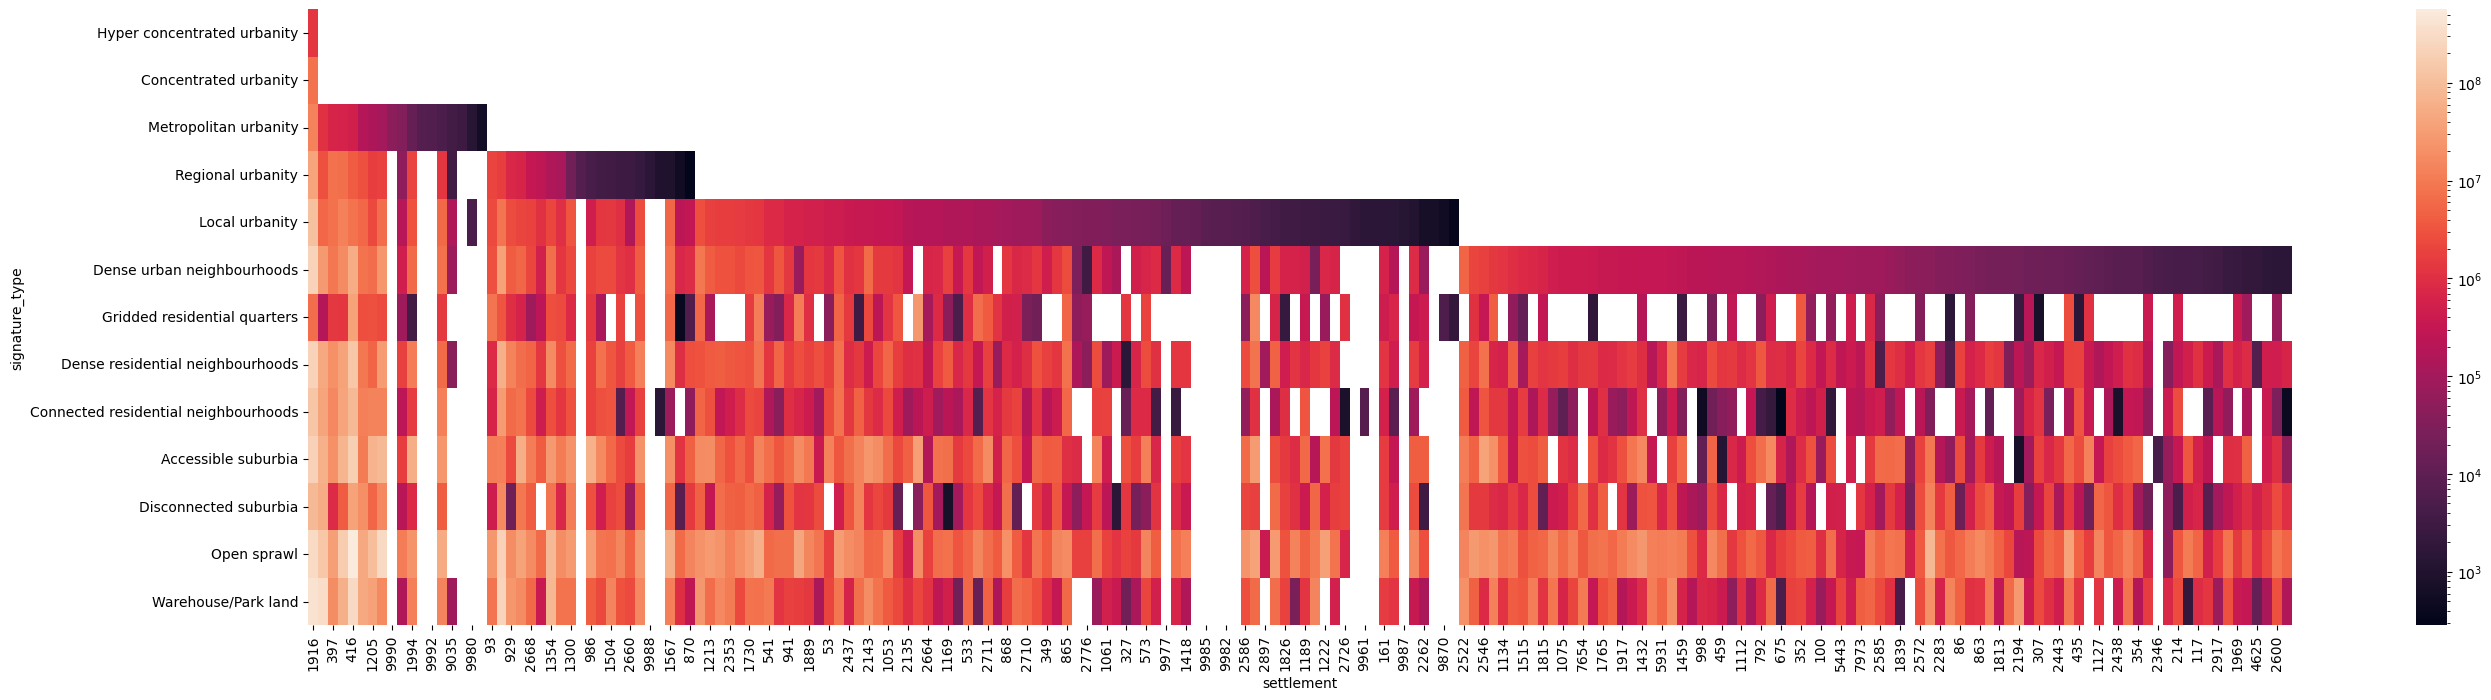

In [80]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.iloc[:200].T, norm=LogNorm())

In [115]:
signatures_urban[signatures_urban.settlement == 1110].explore()

In [82]:
areas["total"] = areas.sum(axis=1)
areas.sort_values("total")

signature_type,Accessible suburbia,Concentrated urbanity,Connected residential neighbourhoods,Dense residential neighbourhoods,Dense urban neighbourhoods,Disconnected suburbia,Gridded residential quarters,Hyper concentrated urbanity,Local urbanity,Metropolitan urbanity,Open sprawl,Regional urbanity,Warehouse/Park land,total
settlement,,,,,,,,,,,,,,
4161,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.598476e-04,0.000000e+00,0.000000e+00,1.598476e-04
5362,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.270652e-03,0.000000e+00,0.000000e+00,5.270652e-03
7082,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.706335e-02,0.000000e+00,0.000000e+00,1.706335e-02
9457,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.720828e-02,1.720828e-02
1594,3.503358e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.503358e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,8.444751e+07,0.000000e+00,1.337555e+07,3.137510e+07,2.479331e+07,1.552982e+07,2.332107e+06,0.000000e+00,6.522618e+06,1.001744e+05,2.786825e+08,1.905346e+06,1.668628e+07,4.757504e+08
1048,1.173756e+07,0.000000e+00,3.097936e+07,5.928168e+07,3.574174e+07,1.610781e+07,3.138634e+06,0.000000e+00,8.388703e+06,0.000000e+00,2.054696e+08,1.589767e+06,2.301838e+08,6.026186e+08
906,6.250311e+07,0.000000e+00,4.149977e+07,4.842811e+07,2.758493e+07,5.417000e+07,1.721331e+05,0.000000e+00,5.745378e+06,1.075760e+06,1.447693e+08,2.806010e+06,3.386016e+08,7.273561e+08


<Axes: ylabel='Frequency'>

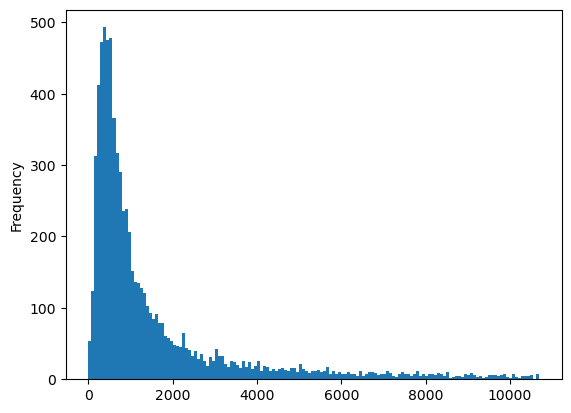

In [93]:
areas["total"][areas["total"]<areas["total"].quantile(.75)].plot.hist(bins=150)

In [91]:
areas["total"].quantile(.25)

524.8585925200732

In [88]:
areas["total"].median()

1266.1718319762128

<Axes: xlabel='settlement', ylabel='signature_type'>

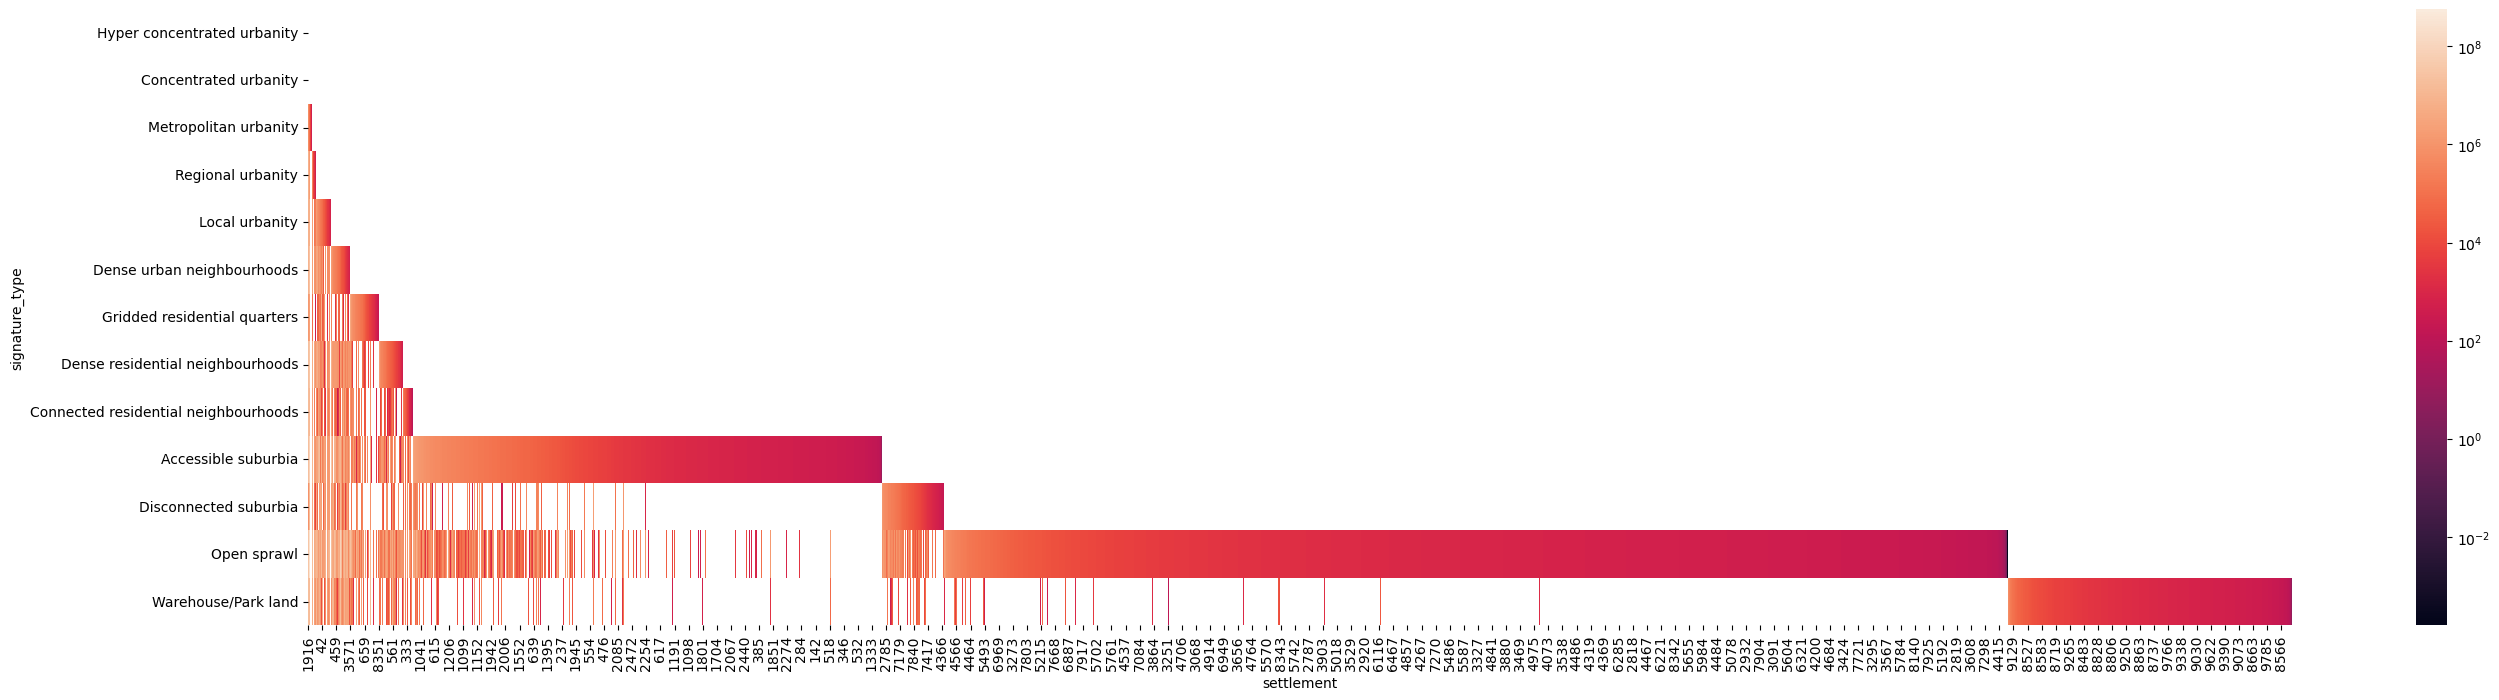

In [96]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm())

In [101]:
placenames = gpd.read_parquet("place.parquet")

In [104]:
%%time
joined = placenames.sjoin(signatures_urban[["geometry", "settlement"]])

CPU times: user 4.42 s, sys: 0 ns, total: 4.42 s
Wall time: 4.41 s


In [106]:
with_names = signatures_urban[signatures_urban.settlement.isin(joined.settlement)]

In [109]:
with_names.settlement.nunique()

1208

In [110]:
no_names = signatures_urban[~signatures_urban.settlement.isin(joined.settlement)]

In [117]:
grouper = with_names.groupby(["settlement", "signature_type"])
areas = grouper["area"].sum().unstack().fillna(0)

In [118]:
areas_sorted = areas.sort_values(order, ascending=False)[order]

<Axes: xlabel='settlement', ylabel='signature_type'>

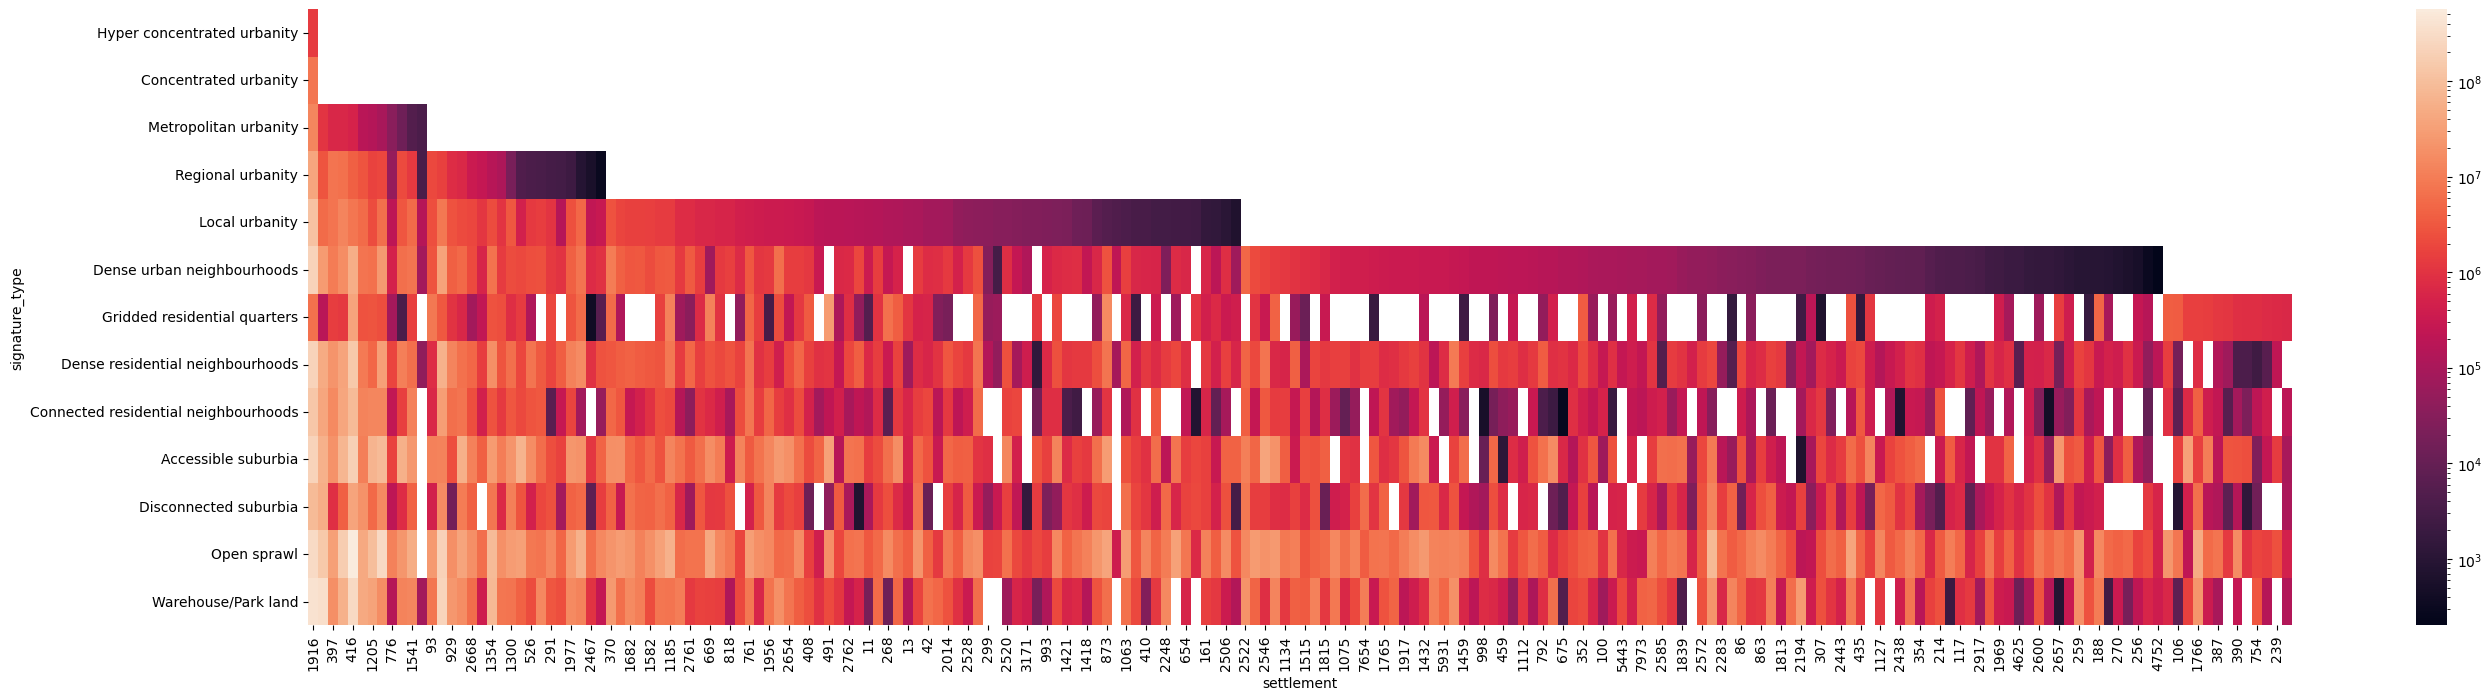

In [119]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.iloc[:200].T, norm=LogNorm())

<Axes: xlabel='settlement', ylabel='signature_type'>

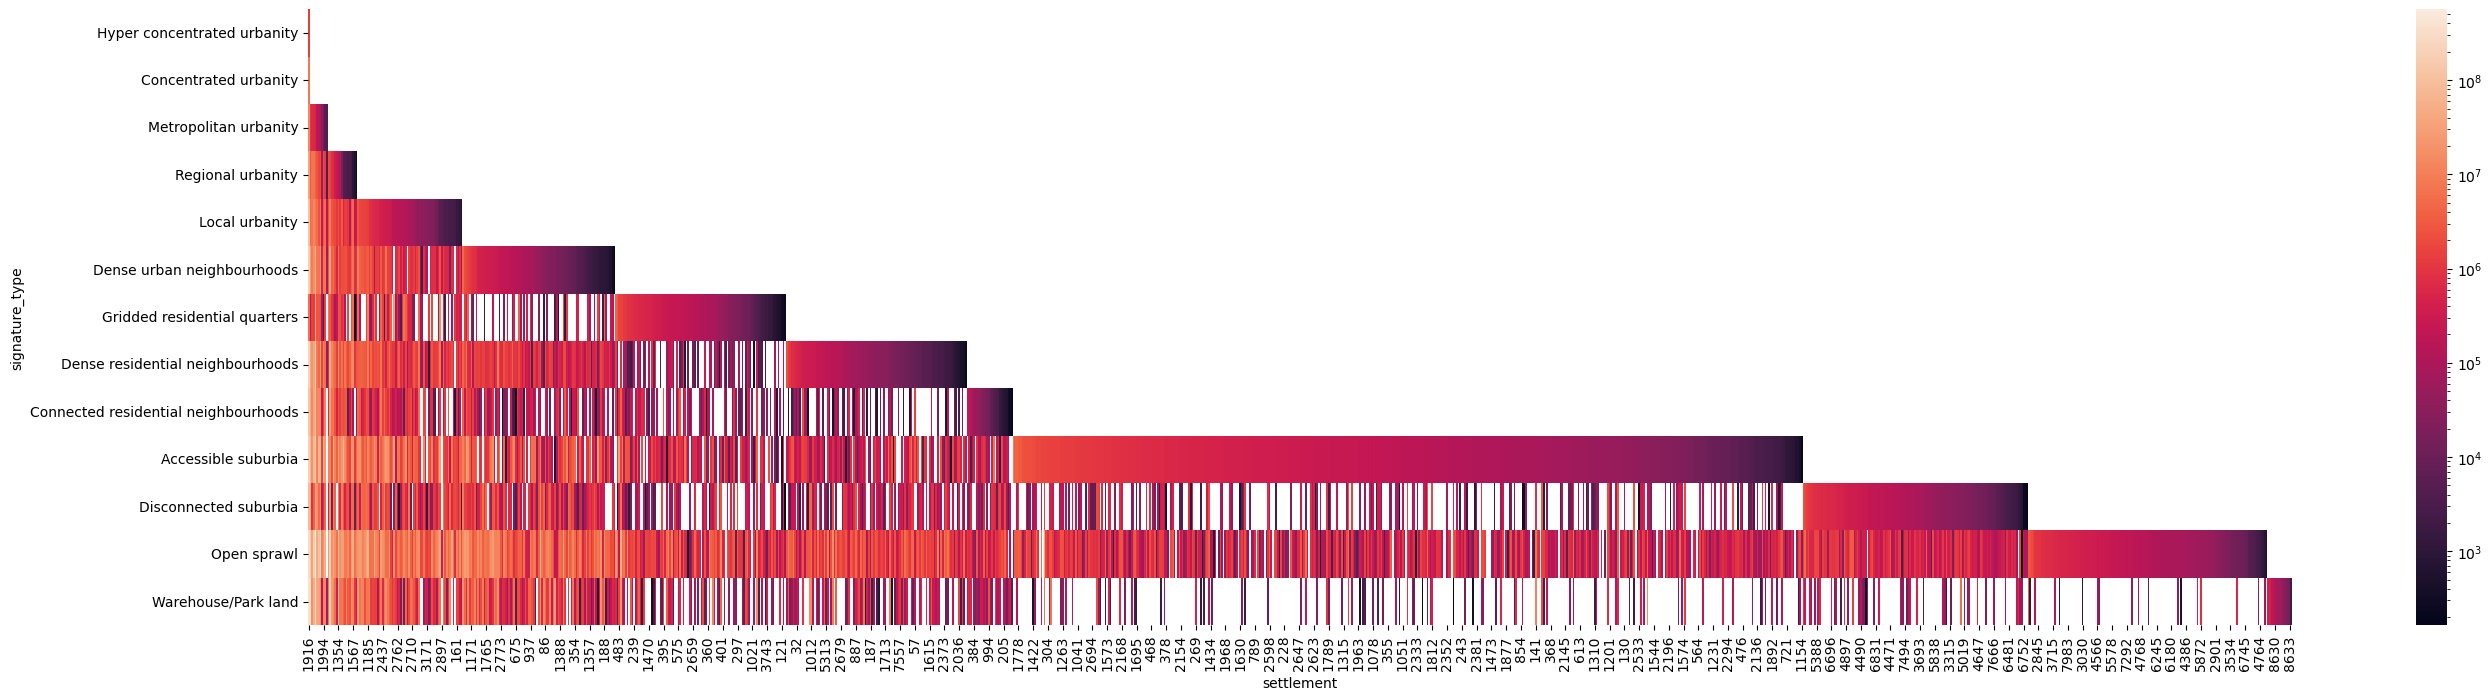

In [120]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm())

<Axes: xlabel='settlement', ylabel='signature_type'>

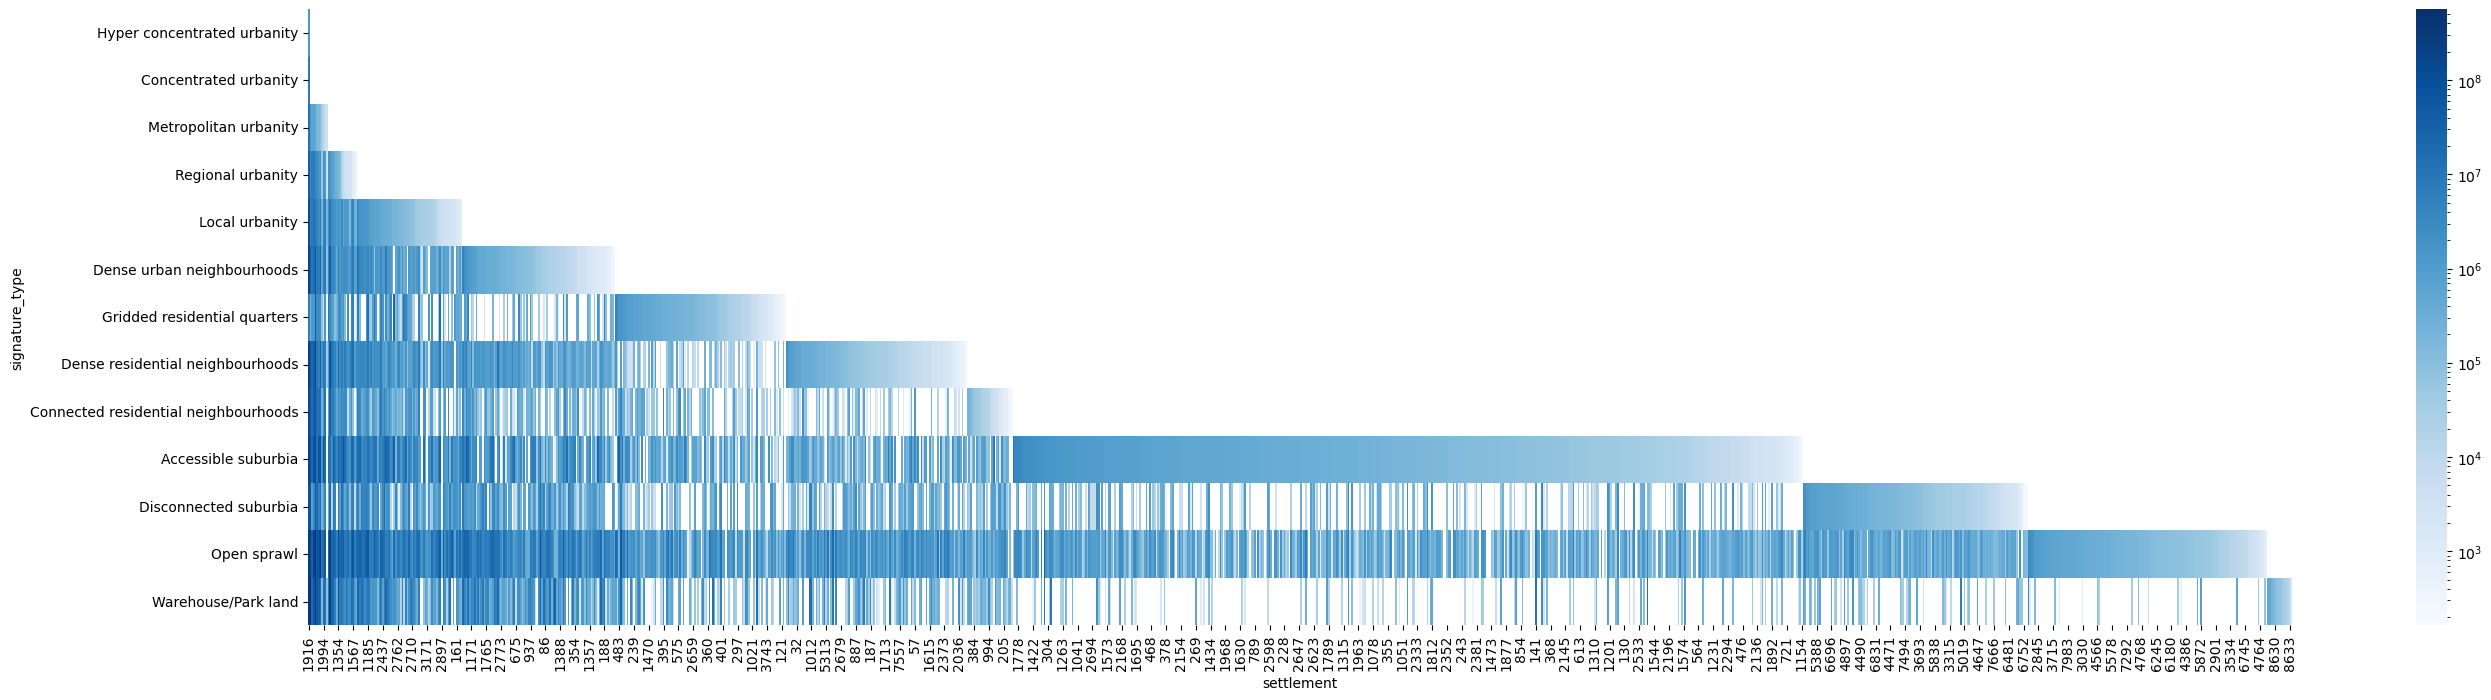

In [121]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm(), cmap="Blues")

In [125]:
import urbangrammar_graphics as ugg
from matplotlib.colors import LinearSegmentedColormap

In [124]:
ugg.COLORS

[(0.19921875, 0.203125, 0.1953125),
 (0.23046875, 0.4296875, 0.55078125),
 (0.73828125, 0.35546875, 0.30859375),
 (0.5625, 0.640625, 0.4921875),
 (0.9375, 0.78125, 0.34375),
 (0.58203125, 0.3984375, 0.4296875)]

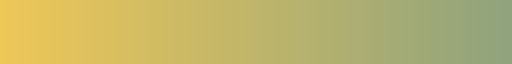

In [150]:
cmap = LinearSegmentedColormap.from_list("ugg", [ugg.COLORS[4], ugg.COLORS[3]])
cmap

<Axes: xlabel='settlement', ylabel='signature_type'>

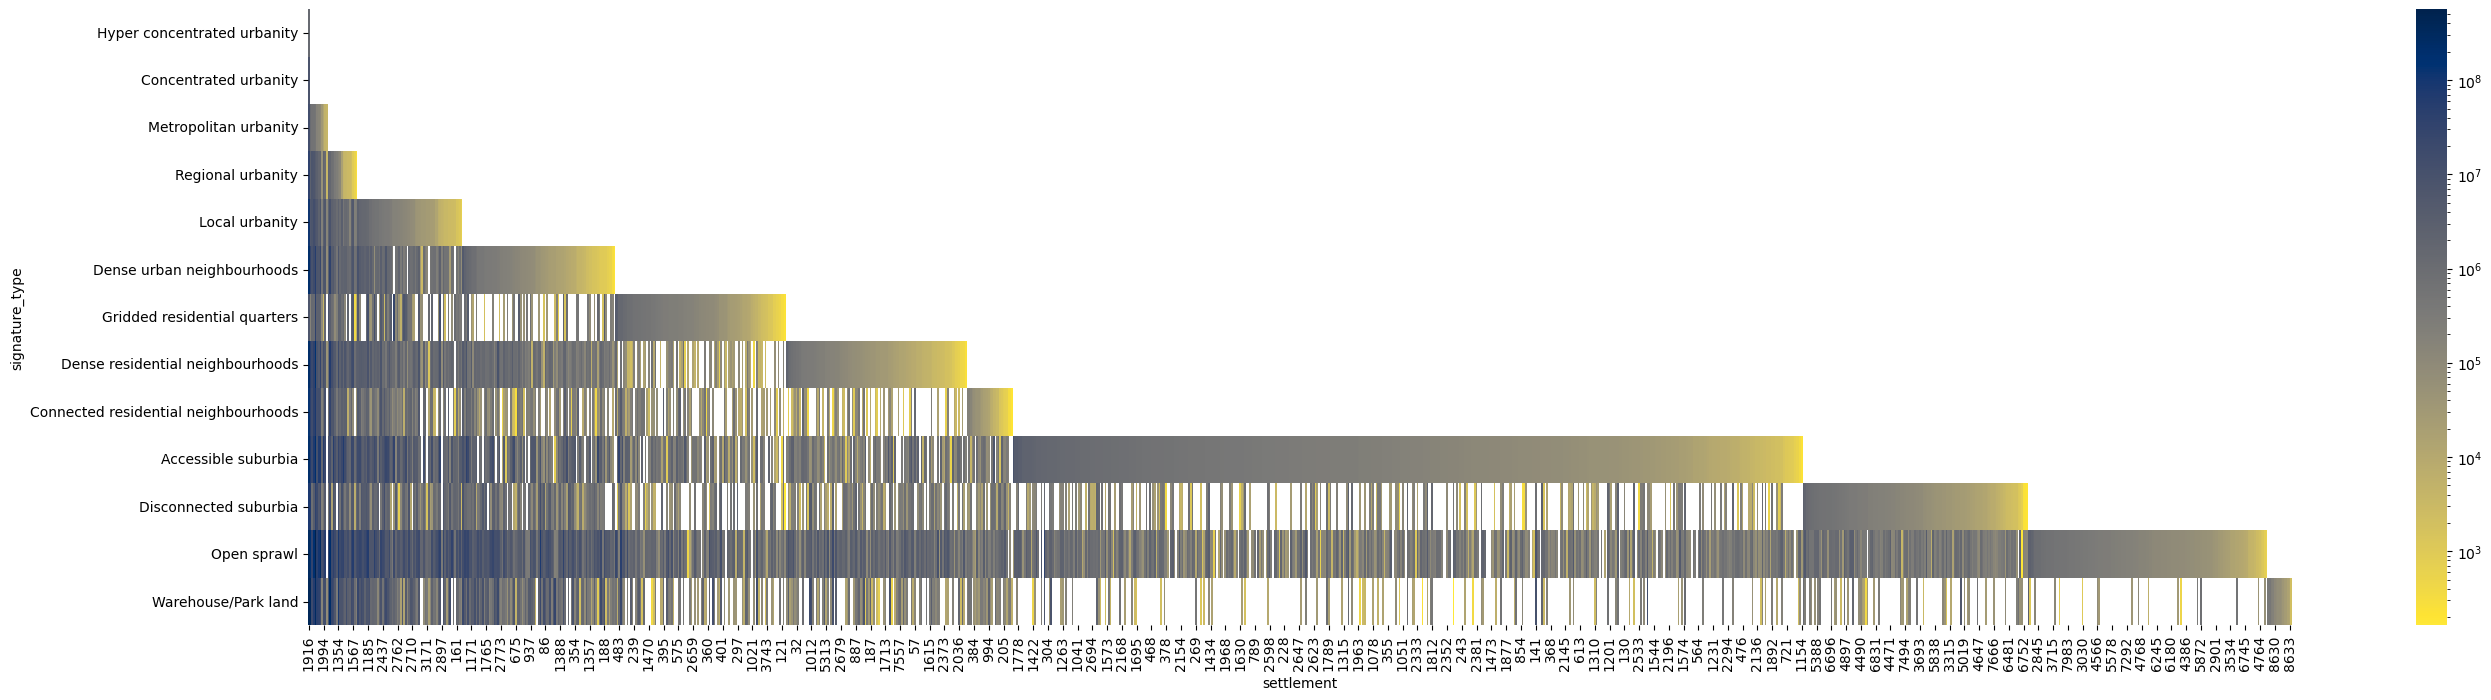

In [153]:
plt.subplots(figsize=(32, 8))
sns.heatmap(data=areas_sorted.T, norm=LogNorm(), cmap="cividis_r")

In [155]:
placenames

,local_type,geometry,name1
2023027,Suburban Area,POINT (418095.000 185406.000),Nythe
2023028,Suburban Area,POINT (292127.000 90785.000),Marsh Barton
2023029,Suburban Area,POINT (295991.000 91247.000),Clyst Heath
2023030,Suburban Area,POINT (233883.000 84586.000),Kensey Valley Meadow
2023031,Suburban Area,POINT (293538.000 93365.000),Polsloe
...,...,...,...
2289904,Other Settlement,POINT (199430.000 907051.000),Garadheancal
2289905,Other Settlement,POINT (636776.000 151377.000),Wingfield Place
2289906,Suburban Area,POINT (480934.000 263680.000),Blackthorn
2289907,Hamlet,POINT (140772.000 799096.000),Raonapoll


In [156]:
with_names

,kmeans10gb,geometry,level2,signature_type,settlement,area
10882,1,"POLYGON Z ((143345.668 932691.413 0.000, 14334...",0.0,Accessible suburbia,0,9.843275e+04
10886,1,"POLYGON Z ((164091.320 40526.696 0.000, 164093...",0.0,Accessible suburbia,3,1.941262e+05
10888,1,"POLYGON Z ((167653.791 43194.946 0.000, 167654...",0.0,Accessible suburbia,5,9.879056e+03
10893,1,"POLYGON Z ((170174.747 41387.203 0.000, 170172...",0.0,Accessible suburbia,8,1.610704e+05
10895,1,"POLYGON Z ((175356.122 54184.967 0.000, 175365...",0.0,Accessible suburbia,10,6.876061e+03
...,...,...,...,...,...,...
96686,9,"POLYGON Z ((528530.170 181095.720 0.000, 52854...",5.0,Hyper concentrated urbanity,1916,2.823163e+04
96687,9,"POLYGON Z ((528602.732 181135.450 0.000, 52857...",5.0,Hyper concentrated urbanity,1916,1.797907e+03
96688,9,"POLYGON Z ((528643.907 181217.443 0.000, 52863...",5.0,Hyper concentrated urbanity,1916,1.271663e+06
96689,9,"POLYGON Z ((528734.582 181316.822 0.000, 52873...",5.0,Hyper concentrated urbanity,1916,1.872188e+03


In [157]:
placenames.local_type.unique()

array(['Suburban Area', 'Hamlet', 'Village', 'Other Settlement', 'Town',
       'City'], dtype=object)

In [158]:
%%time
settlement_boundaries = with_names[["geometry", "settlement"]].dissolve("settlement")

CPU times: user 2min 2s, sys: 71.2 ms, total: 2min 2s
Wall time: 2min 2s


In [189]:
names = []
for poly in settlement_boundaries.geometry:
    names_in = placenames.iloc[placenames.sindex.query(poly, predicate="contains")]
    if names_in.shape[0] == 1:
        names.append(names_in.name1.iloc[0])
    elif (names_in.local_type == "City").any():
        names.append(names_in[names_in.local_type == "City"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Town").any():
        names.append(names_in[names_in.local_type == "Town"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Suburban Area").any():
        names.append(names_in[names_in.local_type == "Suburban Area"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Village").any():
        names.append(names_in[names_in.local_type == "Village"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Hamlet").any():
        names.append(names_in[names_in.local_type == "Hamlet"].name1.str.cat(sep=' - '))
    elif (names_in.local_type == "Other Settlement").any():
        names.append(names_in[names_in.local_type == "Other Settlement"].name1.str.cat(sep=' - '))
    else:
        names.append(None)

In [190]:
settlement_boundaries["name"] = names

In [195]:
settlement_boundaries.to_parquet("settlement_boundaries.parquet")

In [196]:
settlement_boundaries

,geometry,name
settlement,,
0,"POLYGON Z ((142667.472 932126.244 0.000, 14264...",Stornoway
3,"POLYGON Z ((163950.904 40031.623 0.000, 163950...",Camborne
5,"POLYGON Z ((167036.075 42671.447 0.000, 167034...",Illogan
8,"POLYGON Z ((169788.398 41575.672 0.000, 169777...",Redruth
10,"POLYGON Z ((175581.974 54311.766 0.000, 175582...",Perranporth
...,...,...
9497,"POLYGON Z ((501071.199 203479.014 0.000, 50107...",Bovingdon
9526,"POLYGON Z ((504988.264 302841.508 0.000, 50499...",Wittering
9592,"POLYGON Z ((515161.410 416170.202 0.000, 51516...",None
